 # Campo de densidad

Generar un campo de densidad para D=anillo sobre
una malla usando las rutinas de scipy, para luego
transformarla al espacio de Fourier y calcular el espectro de
potencias como producto de dos campos de densidad.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
%matplotlib inline

In [2]:
# Función con lo que se obtiene una distribución uniforme de una caja de lado L,
# dim es la dimesion para 2D o 3D, N es el numero de datos
def caja(dim,L,N):
    return np.random.random((dim, N))*L-0.5*L

In [3]:
# Función con lo que se obtiene una distribución uniforme de un anillo

# Input values: r es el radio mayor, r1 el radio menor, N numero de puntos
def anillo(r,r1,N):
    anillo = []
    i=0
    dim=2
    # Ciclo que obtiene N puntos dentro de un circulo o esfera
    while i<N:
        point = np.random.random(dim)*2*r-r # Se crea el punto
        r_test = (point**2).sum(axis=0)**.5 
        # Se guarda el punto si el punto esta dentro de el circulo
        if (r_test <= r and r_test >= r1 ):
            anillo.append(point)
            i+=1
    anillo = np.array(anillo)
    anillo = anillo.T
    return anillo # Regresa los punTos dentro del circulo

### Aplicando las definiciones generamos datos del anillo y datos random

In [4]:
r,r1,L,ND,NR= 50,40,150,1000,5000
bins = np.linspace(0,2*r,100)

# Generando Datos normales y datos random
D = anillo(r,r1,ND)
R = caja(2,L,NR)

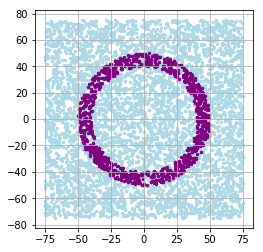

In [5]:
# Graficando los datos NORMALES Y RANDOM
x,y = D
xr,yr = R
plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(xr,yr,color='lightblue',s=6)
ax.scatter(x,y,color='purple',s=6)

ax.grid()
plt.legend()
plt.show()

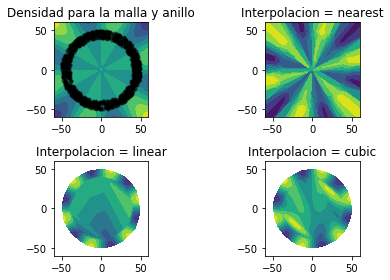

In [6]:
# Malla objetivo a interpolar
xi = yi = np.linspace(-60,60,100)
X,Y = np.meshgrid(xi,yi)

# Definiendo una funcion que sera la densidad para cada punto
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

# Densidad para los puntos de la malla
Z = f(X, Y)

fig, ax = plt.subplots(nrows=2, ncols=2)
# Graficar la funcion densidad para los puntos de la malla
ax[0,0].contourf(X, Y, Z)
ax[0,0].scatter(D[0], D[1], c='k', alpha=0.5, marker='.') # Puntos que corresponden al anillo
ax[0,0].set_title('Densidad para la malla y anillo')
ax[0,0].set_aspect('equal')

# Interpolar usando tres metodos y graficar
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((D[0], D[1]), f(D[0],D[1]), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('Interpolacion = {}'.format(method))
    ax[r,c].set_aspect('equal')
plt.tight_layout()
plt.show()

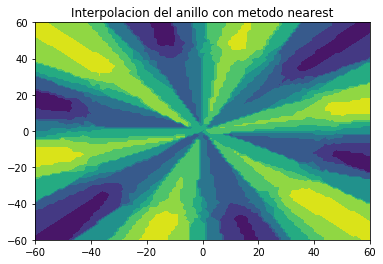

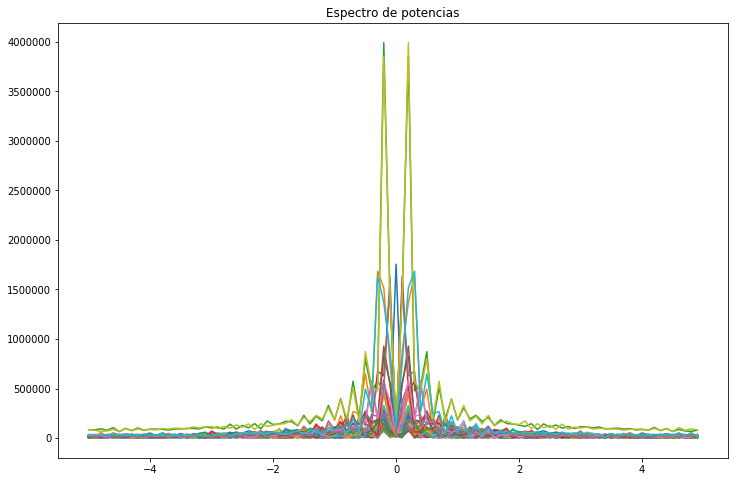

In [7]:

# Usando la interpolación con el método nearest calculamos la transformada de fourier discreta
Ti = griddata((D[0], D[1]), f(D[0],D[1]), (X, Y), method='nearest')
plt.contourf(X,Y,Ti) # Plot de interpolación
plt.title('Interpolacion del anillo con metodo nearest')
plt.show()
# Transformada de fourier en 2D
ft = np.abs(np.fft.fft2(Ti))

# Graficando el espectro de potencias
time_step = 1./10 # Periodo
freqs = np.fft.fftfreq(np.shape(Ti)[0], time_step) # Frecuencias
idx = np.argsort(freqs)
plt.clf()
plt.figure(figsize=(12,8))
plt.plot(freqs[idx], ft[idx])
plt.title('Espectro de potencias')
plt.show()